# Tree - BaseCode - NoClassBalancing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#file = "https://github.com/c2j185/Final_Project/raw/Ben/CleanData.csv"
file = "COVID-19_Case_Surveillance_2021-22-21.csv"
full_results_df1 = pd.read_csv(file)
full_results_df1

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,AR,5,BOONE,5009.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
1,2021-10,MO,29,PHELPS,29161.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
2,2020-10,MO,29,CASS,29037.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN
3,2021-08,TN,47,CLAIBORNE,47025.0,0 - 17 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-11,GA,13,EFFINGHAM,13103.0,0 - 17 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2020-08,NH,33,ROCKINGHAM,33015.0,18 to 49 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Unknown,No,NaN
1048571,2020-06,NC,37,WATAUGA,37189.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,NaN
1048572,2021-07,OK,40,DELAWARE,40041.0,50 to 64 years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Missing,No,NaN
1048573,2021-10,MN,27,BECKER,27005.0,NaN,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN


In [3]:
# Remove unnecessary columns
full_results_df2 = full_results_df1.drop(['case_month'], axis=1)
full_results_df2 = full_results_df2.drop(['state_fips_code'], axis=1)
full_results_df2 = full_results_df2.drop(['res_county'], axis=1)
full_results_df2 = full_results_df2.drop(['county_fips_code'], axis=1)
full_results_df2 = full_results_df2.drop(['ethnicity'], axis=1)
full_results_df2 = full_results_df2.drop(['process'], axis=1)
full_results_df2 = full_results_df2.drop(['case_positive_specimen_interval'], axis=1)
full_results_df2 = full_results_df2.drop(['case_onset_interval'], axis=1)
full_results_df2 = full_results_df2.drop(['current_status'], axis=1)
full_results_df2

,res_state,age_group,sex,race,exposure_yn,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,AR,0 - 17 years,NaN,NaN,Missing,Symptomatic,Missing,Missing,NaN,NaN
1,MO,0 - 17 years,NaN,NaN,Missing,Missing,Unknown,Missing,Unknown,NaN
2,MO,0 - 17 years,Female,NaN,Missing,Symptomatic,Unknown,Missing,Unknown,NaN
3,TN,0 - 17 years,Female,Missing,Missing,Missing,Missing,Missing,Missing,NaN
4,GA,0 - 17 years,Female,Unknown,Missing,Symptomatic,Missing,Missing,Missing,NaN
...,...,...,...,...,...,...,...,...,...,...
1048570,NH,18 to 49 years,Male,White,Missing,Symptomatic,No,Unknown,No,NaN
1048571,NC,18 to 49 years,Male,White,Unknown,Symptomatic,No,Unknown,No,NaN
1048572,OK,50 to 64 years,Male,White,Missing,Unknown,Unknown,Missing,No,NaN
1048573,MN,NaN,NaN,NaN,Missing,Missing,Missing,Missing,No,NaN


In [4]:
# Remove any rows with null values
full_results_df2 = full_results_df2.dropna(how='any')
full_results_df2

,res_state,age_group,sex,race,exposure_yn,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
94,NH,18 to 49 years,Male,Multiple/Other,Missing,Symptomatic,No,Unknown,No,Yes
134,NC,18 to 49 years,Female,White,Missing,Symptomatic,No,Unknown,No,Yes
135,OH,18 to 49 years,Female,White,Yes,Symptomatic,No,Missing,No,Yes
136,CO,18 to 49 years,Female,White,Missing,Missing,No,Missing,Missing,Yes
147,IA,50 to 64 years,Male,White,Yes,Symptomatic,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1048549,AR,18 to 49 years,Male,White,Missing,Symptomatic,No,Missing,No,Yes
1048551,AR,18 to 49 years,Female,Black,Missing,Symptomatic,No,Missing,No,Yes
1048563,IA,65+ years,Female,White,Yes,Asymptomatic,No,No,No,Yes
1048564,OH,0 - 17 years,Male,White,Missing,Asymptomatic,Yes,No,No,Yes


In [5]:
# Remove "Unknown, nul, NA, Missing" values
full_results_df3 = full_results_df2.copy()
#full_results_df3 = full_results_df2.loc[full_results_df2['age_group']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['age_group']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['sex']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['sex']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['sex']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['race']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['race']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['race']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['exposure_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['exposure_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['exposure_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['symptom_status']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['symptom_status']!='nul',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['symptom_status']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['hosp_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['hosp_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['icu_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['icu_yn']!='nul',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['icu_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['death_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['death_yn']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['death_yn']!='Unknown',:]
#full_results_df3

In [6]:
# Does the exposure column only have "Yes?", then drop

exposure_counts = full_results_df3.exposure_yn.value_counts()
print(exposure_counts)

full_results_df3 = full_results_df3.drop(['exposure_yn'], axis=1)

Missing    27036
Yes        18361
Unknown     5420
Name: exposure_yn, dtype: int64


In [7]:
# Make a copy of the df with the empty column "outcome"
results_df = full_results_df3.copy()

results_df["outcome"]=""
results_df

,res_state,age_group,sex,race,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
94,NH,18 to 49 years,Male,Multiple/Other,Symptomatic,No,Unknown,No,Yes,
134,NC,18 to 49 years,Female,White,Symptomatic,No,Unknown,No,Yes,
135,OH,18 to 49 years,Female,White,Symptomatic,No,Missing,No,Yes,
136,CO,18 to 49 years,Female,White,Missing,No,Missing,Missing,Yes,
147,IA,50 to 64 years,Male,White,Symptomatic,Yes,No,No,Yes,
...,...,...,...,...,...,...,...,...,...,...
1048549,AR,18 to 49 years,Male,White,Symptomatic,No,Missing,No,Yes,
1048551,AR,18 to 49 years,Female,Black,Symptomatic,No,Missing,No,Yes,
1048563,IA,65+ years,Female,White,Asymptomatic,No,No,No,Yes,
1048564,OH,0 - 17 years,Male,White,Asymptomatic,Yes,No,No,Yes,


In [8]:
# Populate "outcome" column
for idx, row in results_df.iterrows():
    if row['death_yn'] == "Yes":
        row['outcome'] = "severe"
 
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "mild"
           
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"
        
    elif row['hosp_yn'] == "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"

    elif row['hosp_yn'] == "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"
    
    else:
        row['outcome'] = "mild"


# Print the contents and counts of the "outcome" column
outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

mild      50069
severe      748
Name: outcome, dtype: int64


In [9]:
results_df = results_df.drop(['hosp_yn'], axis=1)
results_df = results_df.drop(['icu_yn'], axis=1)
results_df = results_df.drop(['death_yn'], axis=1)
results_df

,res_state,age_group,sex,race,symptom_status,underlying_conditions_yn,outcome
94,NH,18 to 49 years,Male,Multiple/Other,Symptomatic,Yes,mild
134,NC,18 to 49 years,Female,White,Symptomatic,Yes,mild
135,OH,18 to 49 years,Female,White,Symptomatic,Yes,mild
136,CO,18 to 49 years,Female,White,Missing,Yes,mild
147,IA,50 to 64 years,Male,White,Symptomatic,Yes,mild
...,...,...,...,...,...,...,...
1048549,AR,18 to 49 years,Male,White,Symptomatic,Yes,mild
1048551,AR,18 to 49 years,Female,Black,Symptomatic,Yes,mild
1048563,IA,65+ years,Female,White,Asymptomatic,Yes,mild
1048564,OH,0 - 17 years,Male,White,Asymptomatic,Yes,mild


In [10]:
results_df.to_csv('CleanData.csv', index = False)

In [11]:
# Print the contents and counts of the "outcome" column
age_group_counts = results_df.age_group.value_counts()
print(age_group_counts)
print("")

sex_counts = results_df.sex.value_counts()
print(sex_counts)
print("")

race_counts = results_df.race.value_counts()
print(race_counts)
print("")

symptom_counts = results_df.symptom_status.value_counts()
print(symptom_counts)
print("")

condition_counts = results_df.underlying_conditions_yn.value_counts()
print(condition_counts)
print("")

outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

18 to 49 years    28253
50 to 64 years    10474
65+ years          7510
0 - 17 years       4565
Missing              15
Name: age_group, dtype: int64

Female     33355
Male       17423
Unknown       31
Missing        8
Name: sex, dtype: int64

White                            41395
Black                             4301
Unknown                           2229
Missing                           1317
Multiple/Other                    1071
American Indian/Alaska Native      276
Asian                              228
Name: race, dtype: int64

Symptomatic     46355
Asymptomatic     2377
Missing          1351
Unknown           734
Name: symptom_status, dtype: int64

Yes    49498
No      1319
Name: underlying_conditions_yn, dtype: int64

mild      50069
severe      748
Name: outcome, dtype: int64


In [12]:
# Bar graph of outcome
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
mild = results_df['outcome']=='mild'
mild = results_df[results_df['outcome']=='mild']
mild = mild['outcome'].count()

severe = results_df['outcome']=='severe'
severe = results_df[results_df['outcome']=='severe']
severe = severe['outcome'].count()

outcome = {"Mild": mild, "Severe": severe}
category = list(outcome.keys())
count = list(outcome.values())
print(category)
print(count)

['Mild', 'Severe']
[50069, 748]


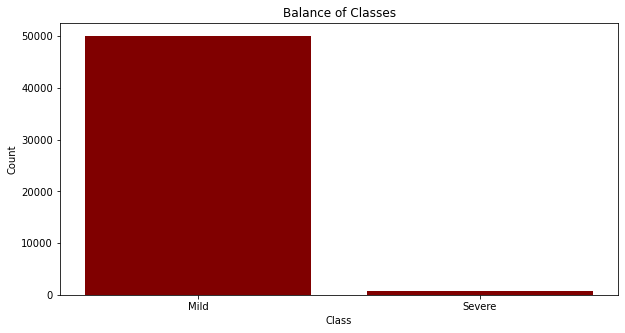

In [13]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, count, color = 'maroon')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Balance of Classes")
plt.show()

In [14]:
# Encode with "get_dummies"
part_encoded_df = results_df.copy()
part_encoded_df = pd.get_dummies(part_encoded_df, columns=['res_state', 'age_group', 'sex', 'race', 'symptom_status',
                                                           'underlying_conditions_yn'])


# Encode "outcome"
le=LabelEncoder()
part_encoded_df['outcome'] = le.fit_transform(part_encoded_df['outcome'])
results_encoded_df = part_encoded_df.copy()
results_encoded_df

,outcome,res_state_AK,res_state_AL,res_state_AR,res_state_AZ,res_state_CA,res_state_CO,res_state_FL,res_state_GA,res_state_IA,...,race_Missing,race_Multiple/Other,race_Unknown,race_White,symptom_status_Asymptomatic,symptom_status_Missing,symptom_status_Symptomatic,symptom_status_Unknown,underlying_conditions_yn_No,underlying_conditions_yn_Yes
94,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
136,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
147,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048549,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1048551,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1048563,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
1048564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [15]:
outcome_encode = results_df[['outcome']].copy()
outcome_encode['outcome_encode'] = le.fit_transform(results_df['outcome'].values)
outcome_encode = outcome_encode.drop_duplicates('outcome')

#results_encoded_df
outcome_encode

,outcome,outcome_encode
94,mild,0
1466,severe,1


In [16]:
results_encoded_df

,outcome,res_state_AK,res_state_AL,res_state_AR,res_state_AZ,res_state_CA,res_state_CO,res_state_FL,res_state_GA,res_state_IA,...,race_Missing,race_Multiple/Other,race_Unknown,race_White,symptom_status_Asymptomatic,symptom_status_Missing,symptom_status_Symptomatic,symptom_status_Unknown,underlying_conditions_yn_No,underlying_conditions_yn_Yes
94,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
136,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
147,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048549,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1048551,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1048563,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
1048564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [17]:
# Scale the data
# scaler = StandardScaler()
# results_scaled = scaler.fit_transform(results_encoded_df)
# results_scaled

In [18]:
X = results_encoded_df.copy()
X = X.drop("outcome", axis=1)
X

,res_state_AK,res_state_AL,res_state_AR,res_state_AZ,res_state_CA,res_state_CO,res_state_FL,res_state_GA,res_state_IA,res_state_ID,...,race_Missing,race_Multiple/Other,race_Unknown,race_White,symptom_status_Asymptomatic,symptom_status_Missing,symptom_status_Symptomatic,symptom_status_Unknown,underlying_conditions_yn_No,underlying_conditions_yn_Yes
94,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
136,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
147,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048549,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1048551,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1048563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1048564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [19]:
y = results_encoded_df["outcome"].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38112, 62)
(12705, 62)
(38112,)
(12705,)


# Decision Tree Model

In [21]:
# Decision Tree Model
model=tree.DecisionTreeClassifier()
model=model.fit(X_train, y_train)

predictions=model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
cm_df=pd.DataFrame(cm)
cm_df=pd.DataFrame(
    cm, index=["Actual Mild", "Actual Severe"],
    columns=["Predicted Mild", "Predicted Severe"])
cm_df

,Predicted Mild,Predicted Severe
Actual Mild,12509,7
Actual Severe,173,16


In [22]:
acc_score=accuracy_score(y_test, predictions)
acc_score

0.9858323494687131

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12516
           1       0.70      0.08      0.15       189

    accuracy                           0.99     12705
   macro avg       0.84      0.54      0.57     12705
weighted avg       0.98      0.99      0.98     12705

